In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("advertising.csv")

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


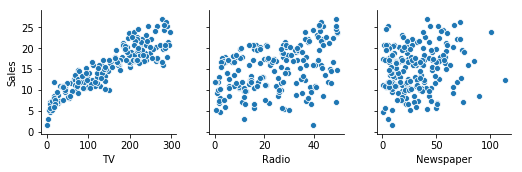

In [13]:
sns.pairplot(x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],data=df,aspect=1)

In [14]:
# we see that there is good relation bw the tv and the sales

In [15]:
#lets try to plot using stats model first

In [16]:
!pip install statsmodel

  Could not find a version that satisfies the requirement statsmodel (from versions: )
No matching distribution found for statsmodel


In [17]:
import statsmodels.api as sm

In [18]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df[['TV','Radio','Newspaper']], df['Sales'], test_size=0.33, random_state=42)

In [24]:
X_train.head()

,TV,Radio,Newspaper
42,293.6,27.7,1.8
189,18.7,12.1,23.4
90,134.3,4.9,9.3
136,25.6,39.0,9.3
51,100.4,9.6,3.6


In [25]:
len(df)

200

In [26]:
y_train.head()

42     20.7
189     6.7
90     14.0
136     9.5
51     10.7
Name: Sales, dtype: float64

In [32]:
cons =  sm.add_constant(X_train['TV'])

In [33]:
lr = sm.OLS(y_train,cons).fit()

In [34]:
lr.params

const    7.127013
TV       0.055699
dtype: float64

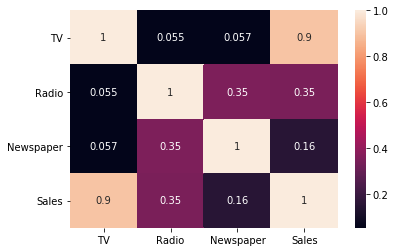

In [39]:
sns.heatmap(df.corr(),annot=True)

In [40]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     541.6
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           1.48e-48
Time:                        01:17:22   Log-Likelihood:                -299.38
No. Observations:                 134   AIC:                             602.8
Df Residuals:                     132   BIC:                             608.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1270      0.423     16.842      0.000       6.290       7.964
TV             0.0557      0.002     23.272      0.000       0.051       0.060
==============================================================================
Omnibus:                        1.183   Durbin-Watson:                   2.363
Prob(Omnibus):                  0.553   Jarque-Bera (JB):                1.275
Skew:                          -0.206   Prob(JB):                        0.529
Kurtosis:                       2.759   Cond. No.                         380.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

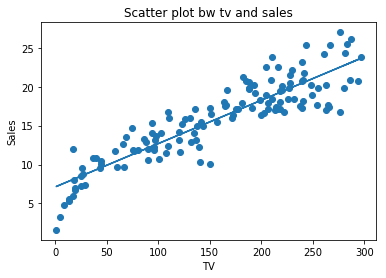

In [49]:
plt.scatter(X_train['TV'],y_train)
plt.plot(X_train['TV'],(X_train['TV']*0.0557 + 7.127))
plt.title('Scatter plot bw tv and sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [45]:
len(y_train)

134

In [51]:
y_train_pred = lr.predict(cons)

In [52]:
res = (y_train - y_train_pred)

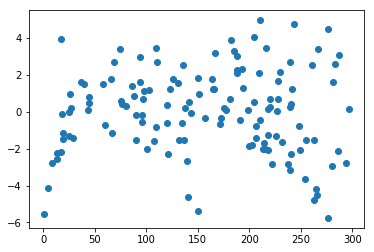

In [56]:
plt.scatter(x=X_train['TV'],y=res)

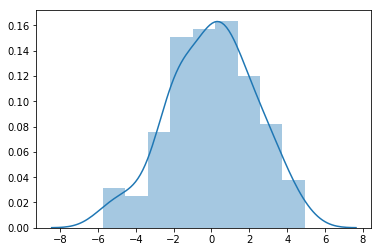

In [57]:
sns.distplot(res)

In [58]:
#time to predict

In [59]:
test_cons = sm.add_constant(X_test["TV"])
y_test_pred =  lr.predict(test_cons)
test_res = y_test-y_test_pred

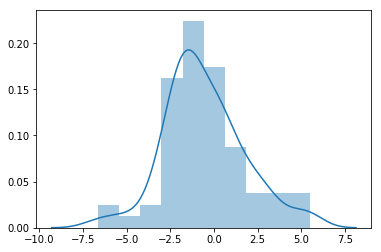

In [61]:
sns.distplot(test_res)

In [62]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error

In [65]:
r2 = r2_score(y_test,y_test_pred)
print(r2)

0.8025872552039548


In [69]:
r2 = mean_squared_error(y_test,y_test_pred)
print(np.sqrt(r2))

2.3559186485498698


In [67]:
r2 = mean_absolute_error(y_test,y_test_pred)
print(r2)

1.8785029458050497


In [68]:
r2 = mean_squared_log_error(y_test,y_test_pred)
print(r2)

0.02325768322570917
